# 图11 发散型文本

发散的文本类似于发散的条形图，以一种漂亮且美观的方式显示图表中每个项目的值.

1.23.5
2.0.0
3.7.1
0.12.2


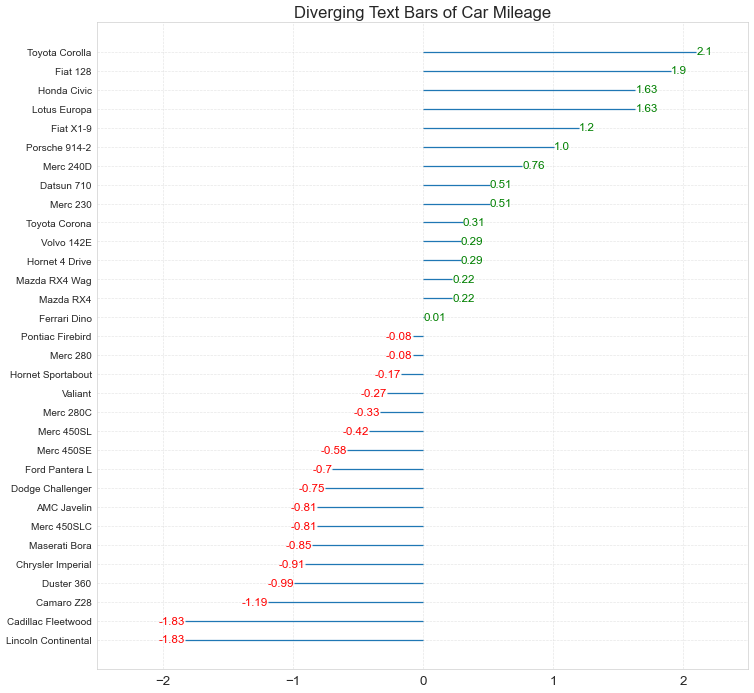

In [1]:
from doc.Plot.require import *

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
# df = pd.read_csv("../data/mtcars.csv")

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 14), dpi=60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color': 'red' if x < 0 else 'green', 'size': 14})

# Decorations
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()